In [3]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_circles
# Generate data with make_circles
np. random . seed (5)
X, y = make_circles ( n_samples =500 , factor =0.3 , noise =0.1)

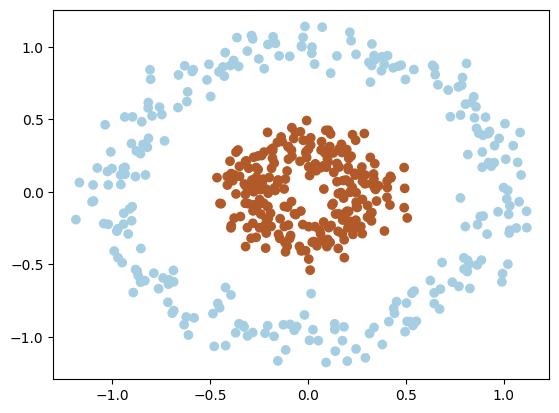

In [4]:
plt.scatter (X [:, 0], X [:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

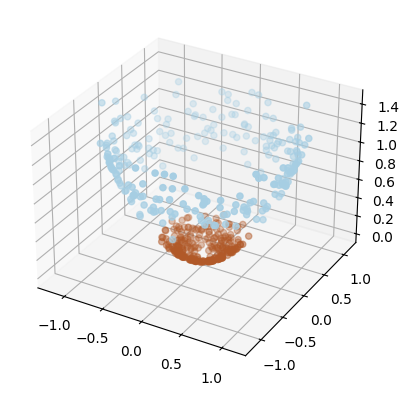

In [5]:
def mappingKernel (x1,x2) :
    return x1,x2,x1**2 + x2**2


mappedx_1 ,mappedy_1 ,mappedz_1 = mappingKernel (X [:, 0], X [:, 1])

# visualize in 3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure ()
ax = fig.add_subplot (111 , projection ='3d')
ax.scatter (mappedx_1 ,mappedy_1 ,mappedz_1 , c=y, cmap=plt.cm.Paired)
plt.show()


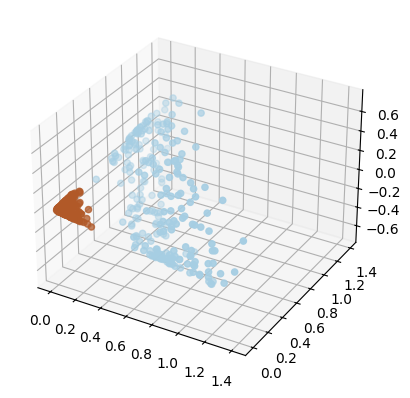

In [6]:
def mappingKernel (x1,x2) :
    return x1**2,x2**2,x1*x2


mappedx_2 ,mappedy_2 ,mappedz_2 = mappingKernel (X [:, 0], X [:, 1])

# visualize in 3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure ()
ax = fig.add_subplot (111 , projection ='3d')
ax.scatter (mappedx_2 ,mappedy_2 ,mappedz_2 , c=y, cmap=plt.cm.Paired)
plt.show()


Accuracy: 0.45
F1 score: 0.6206896551724138


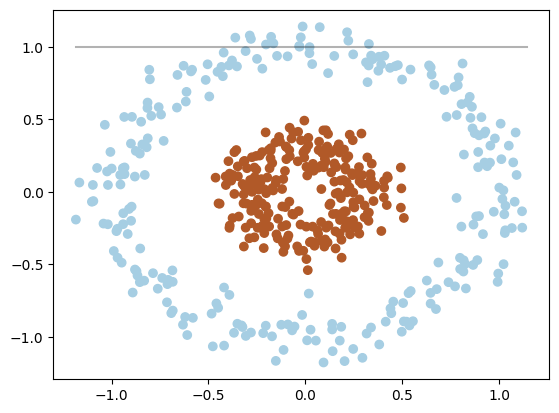

In [7]:
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of the LinearSVC class and fit it to the training data
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

plt.scatter (X [:, 0], X [:, 1], c=y, cmap=plt.cm.Paired)


xx = np.linspace(X.min(), X.max(), 50)
yy = (svm_classifier.intercept_ - svm_classifier.coef_[0][0] * xx)
plt.plot(xx, yy, alpha=0.3, color='Black')




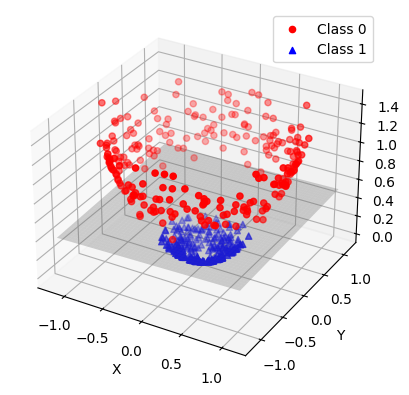

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [8]:
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Create a linear SVM
svm_classifier = SVC(kernel='linear')

# Use the mapped 3-dimensional data
mapped_data = np.column_stack((mappedx_1, mappedy_1, mappedz_1))

# Split the test and training data sets.

X_train, X_test, y_train, y_test = train_test_split(mapped_data, y, test_size=0.2)

# Fit the SVM model
svm_classifier.fit(X_train,y_train)

# Make predictions using the model

y_pred = svm_classifier.predict(X_test)

# Visualize the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(mappedx_1[y == 0], mappedy_1[y == 0], mappedz_1[y == 0], color='r', marker='o', label='Class 0')
ax.scatter(mappedx_1[y == 1], mappedy_1[y == 1], mappedz_1[y == 1], color='b', marker='^', label='Class 1')

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(mappedx_1.min(), mappedx_1.max(), 50),
                     np.linspace(mappedy_1.min(), mappedy_1.max(), 50))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0][0] * xx - svm_classifier.coef_[0][1] * yy) / svm_classifier.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()


# Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))



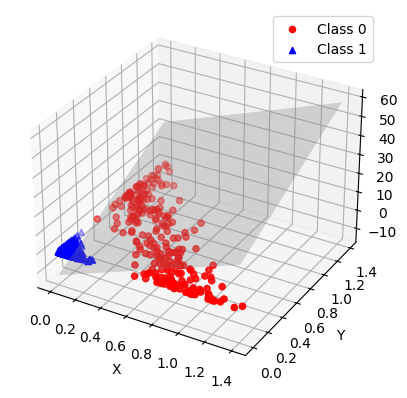

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [9]:
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Create a linear SVM
svm_classifier = SVC(kernel='linear')

# Use the mapped 3-dimensional data
mapped_data = np.column_stack((mappedx_2, mappedy_2, mappedz_2))

X_train, X_test, y_train, y_test = train_test_split(mapped_data, y, test_size=0.2)

# Fit the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions

y_pred = svm_classifier.predict(X_test)

# Visualize the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(mappedx_2[y == 0], mappedy_2[y == 0], mappedz_2[y == 0], color='r', marker='o', label='Class 0')
ax.scatter(mappedx_2[y == 1], mappedy_2[y == 1], mappedz_2[y == 1], color='b', marker='^', label='Class 1')

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(mappedx_2.min(), mappedx_2.max(), 50),
                     np.linspace(mappedy_2.min(), mappedy_2.max(), 50))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0][0] * xx - svm_classifier.coef_[0][1] * yy) / svm_classifier.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()

# Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))



In [10]:
# # Run linear svm on the 3 dimensional mapped data

# # Split the data into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(np.column_stack((mappedx_1,mappedy_1,mappedz_1)), y, test_size=0.2)

# # Create an instance of the LinearSVC class and fit it to the training data

# clf = svm.SVC(kernel='linear')
# clf.fit(X_train, y_train)


# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 score:", f1_score(y_test, y_pred))





In [11]:
# # Run linear svm on the 3 dimensional mapped data

# # Split the data into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(np.column_stack((mappedx_2,mappedy_2,mappedz_2)), y, test_size=0.2)

# # Create an instance of the LinearSVC class and fit it to the training data

# clf = svm.SVC(kernel='linear')
# clf.fit(X_train, y_train)


# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 score:", f1_score(y_test, y_pred))


In [12]:
# # Run linear svm on the mapped data

# # Split the data into training and testing sets

# mappedx_1 = mappedx_1.reshape(-1, 1)

# X_train, X_test, y_train, y_test = train_test_split(mappedx_1, y, test_size=0.2)

# # Create an instance of the LinearSVC class and fit it to the training data
# clf = svm.SVC(kernel='linear')
# clf.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 score:", f1_score(y_test, y_pred))



In [13]:
# # Run linear svm on the mapped data

# # Split the data into training and testing sets

# mappedx_2 = mappedx_2.reshape(-1, 1)

# X_train, X_test, y_train, y_test = train_test_split(mappedx_2, y, test_size=0.2)

# # Create an instance of the LinearSVC class and fit it to the training data
# clf = svm.SVC(kernel='linear')
# clf.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)


